# Boston House Prices Prediction



## Project Overview

The Boston House Prices project is a comprehensive machine learning endeavor aimed at predicting housing prices using the Boston Standard Metropolitan Statistical Area (SMSA) dataset from 1970. This project is an exercise in applying regression algorithms to real-world data, as first chapter on the book Hands on ML.

## Project Steps

- **Data Understanding**: Familiarize with the dataset and define project goals.
- **Data Preparation**: Load, clean, and preprocess the data.
- **Exploratory Data Analysis (EDA)**: Analyze data to uncover patterns and relationships.
- **Feature Engineering**: Enhance the dataset with new, relevant features.
- **Model Development**: Select and train regression models.
- **Model Evaluation and Tuning**: Assess model performance and optimize parameters.
- **Deployment Strategy**: Outline the approach for real-world application.
- **Documentation and Reporting**: Summarize methodology and insights.

## Objectives

- **Primary Goal**: Predict the median values of homes in Boston using various housing attributes.
- **Insight Generation**: Extract meaningful insights to understand the housing market dynamics.
- **Skill Demonstration**: Showcase data processing, modeling, and evaluation skills in a real-world context.
- **Application Potential**: Develop a model that can be adapted for practical use or future studies.


In [72]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score


In [73]:
# Load the dataset
file_path = 'housing-2.csv'  
data = pd.read_csv(file_path, delimiter=';')
data = pd.read_csv(file_path, delimiter='\t')

# If the delimiter is a space (be careful with spaces, especially if data values themselves can contain spaces)
data = pd.read_csv(file_path, delim_whitespace=True)

# Display the first few rows of the dataset
print(data.head())


   0.00632  18.00  2.310  0  0.5380  6.5750  65.20  4.0900  1  296.0  15.30  \
0  0.02731    0.0   7.07  0   0.469   6.421   78.9  4.9671  2  242.0   17.8   
1  0.02729    0.0   7.07  0   0.469   7.185   61.1  4.9671  2  242.0   17.8   
2  0.03237    0.0   2.18  0   0.458   6.998   45.8  6.0622  3  222.0   18.7   
3  0.06905    0.0   2.18  0   0.458   7.147   54.2  6.0622  3  222.0   18.7   
4  0.02985    0.0   2.18  0   0.458   6.430   58.7  6.0622  3  222.0   18.7   

   396.90  4.98  24.00  
0  396.90  9.14   21.6  
1  392.83  4.03   34.7  
2  394.63  2.94   33.4  
3  396.90  5.33   36.2  
4  394.12  5.21   28.7  


## Explanation of Each Column in the Dataset

- **CRIM**: Per capita crime rate by town, indicating area safety.
- **ZN**: Proportion of residential land zoned for larger lots, suggesting spaciousness of residential areas.
- **INDUS**: Proportion of non-retail business acres, indicating industrial vs. residential balance.
- **CHAS**: Charles River dummy variable, showing if a tract bounds the river, impacting location desirability.
- **NOX**: Nitric oxides concentration, an environmental metric for air quality.
- **RM**: Average number of rooms per dwelling, generally indicating house size.
- **AGE**: Proportion of owner-occupied units built before 1940, signifying older vs. newer housing.
- **DIS**: Weighted distances to Boston employment centers, reflecting job accessibility.
- **RAD**: Accessibility index to radial highways, representing connectivity to major roads.
- **TAX**: Full-value property-tax rate, a financial aspect for homeowners.
- **PTRATIO**: Pupil-teacher ratio by town, an education quality indicator.
- **B**: Proportion of the black population by town, a demographic metric.
- **LSTAT**: Percentage of lower status population, a socio-economic indicator.
- **MEDV**: Median value of owner-occupied homes (in $1000s), the target variable for the model.


### Renaming Columns

In [74]:
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data.columns = column_names

# Now print the first few rows of the dataset
print(data.head())

# And the basic information about the dataset
print(data.info())

# And the statistical summary
print(data.describe())


      CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0  0.02731  0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0     17.8   
1  0.02729  0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0     17.8   
2  0.03237  0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0     18.7   
3  0.06905  0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0     18.7   
4  0.02985  0.0   2.18     0  0.458  6.430  58.7  6.0622    3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   9.14  21.6  
1  392.83   4.03  34.7  
2  394.63   2.94  33.4  
3  396.90   5.33  36.2  
4  394.12   5.21  28.7  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    

In [75]:
nil# Missing values check
print(data.isnull().sum())
#The dataset contains 505 entries with no missing values across 14 features,
#simplifies the preprocessing stage as there's no need for imputation strategies

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [76]:
# Summary statistics
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  505.000000  505.000000  505.000000  505.000000  505.000000  505.000000   
mean     3.620667   11.350495   11.154257    0.069307    0.554728    6.284059   
std      8.608572   23.343704    6.855868    0.254227    0.115990    0.703195   
min      0.009060    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082210    0.000000    5.190000    0.000000    0.449000    5.885000   
50%      0.259150    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.678220   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  505.000000  505.000000  505.000000  505.000000  505.000000  505.000000   
mean    68.581584    3.794459    9.566337  408.459406   18.461782  356.594376   
std     28.176371    2.1077

In [77]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


## Distribution and Spread

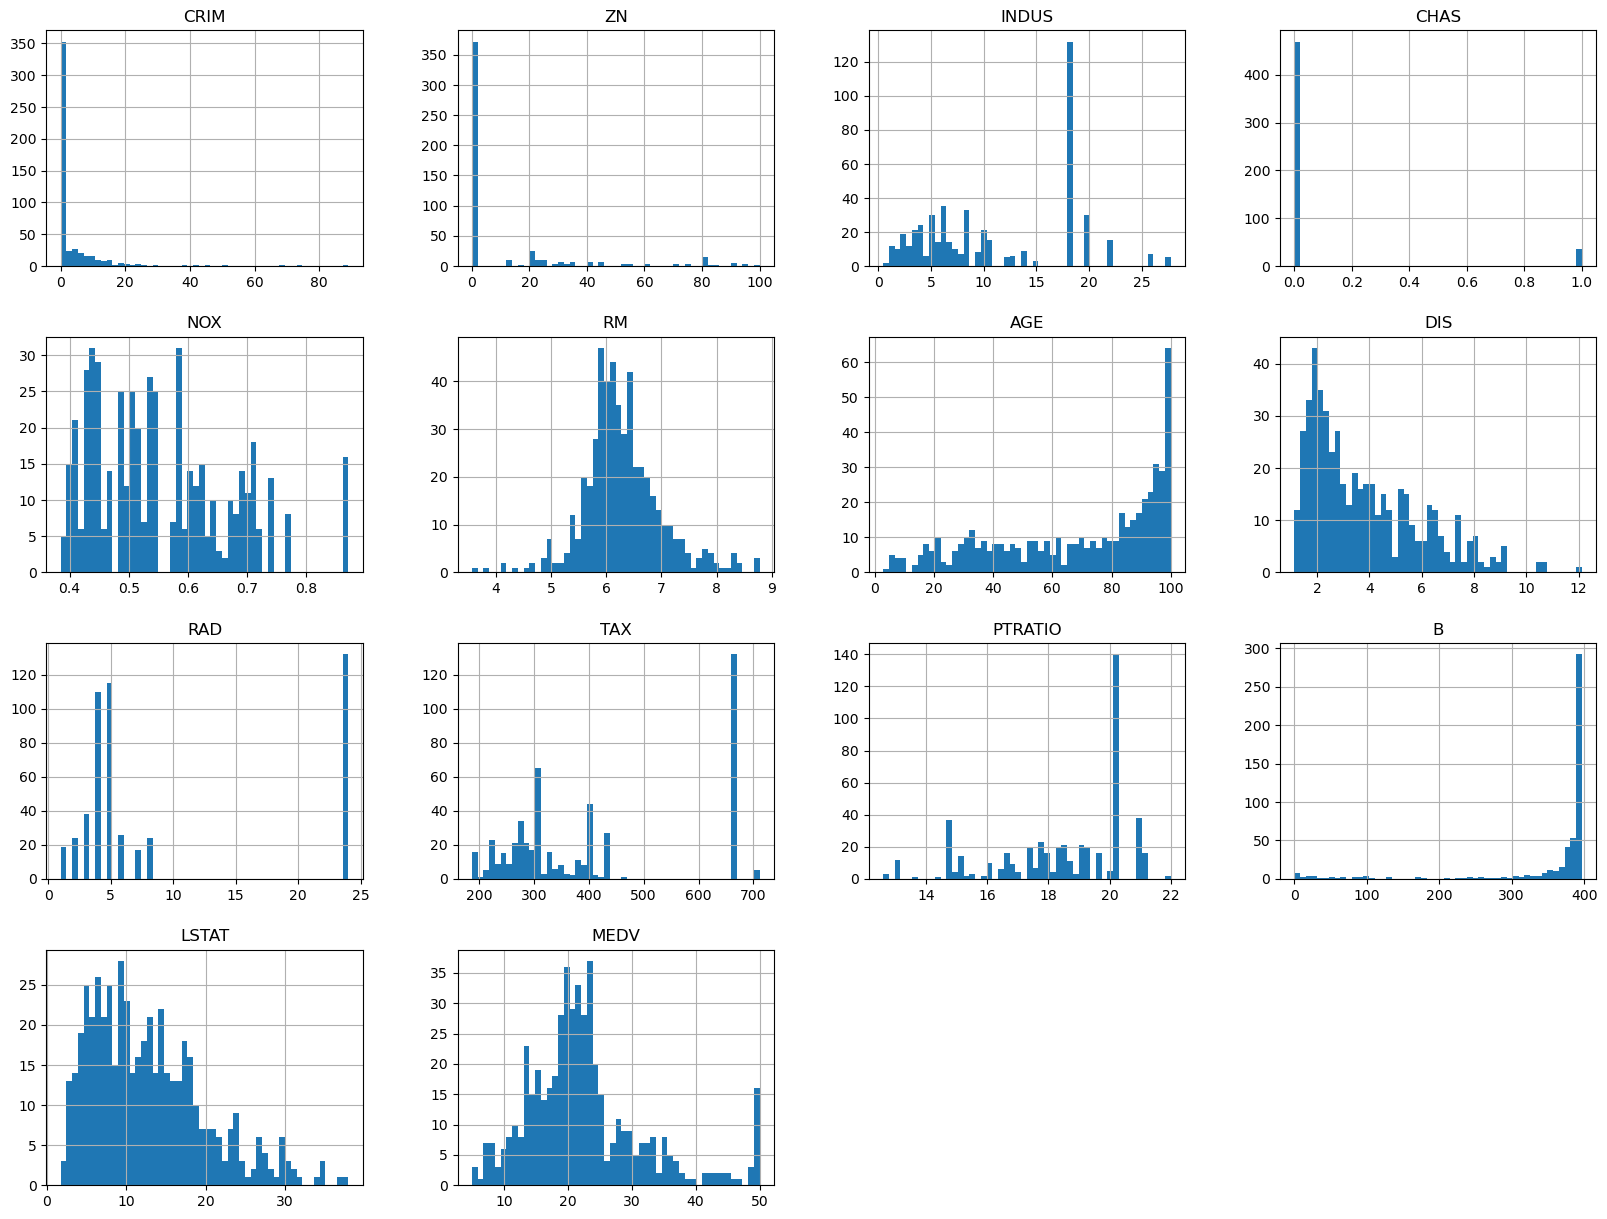

In [78]:
# Histograms for distribution
data.hist(bins=50, figsize=(20,15))
plt.show()

In [79]:
# Skewness and Kurtosis
skewness = data.skew()
kurtosis = data.kurtosis()
print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

# Correlation Matrix (Numerical)
corr_matrix = data.corr()
print("\nCorrelation Matrix:\n", corr_matrix)

# Correlation Coefficient for RM and MEDV
correlation_rm_medv = data['RM'].corr(data['MEDV'])
print("\nCorrelation between RM and MEDV:", correlation_rm_medv)

# Quartiles and Outliers from Box Plot Data
quartiles = data['MEDV'].quantile([0.25, 0.5, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
outlier_thresholds = [quartiles[0.25] - 1.5 * iqr, quartiles[0.75] + 1.5 * iqr]
print("\nQuartiles for MEDV:", quartiles)
print("Outlier Thresholds for MEDV:", outlier_thresholds)


Skewness:
 CRIM       5.218396
ZN         2.225665
INDUS      0.292762
CHAS       3.401726
NOX        0.727784
RM         0.405743
AGE       -0.599111
DIS        1.011674
RAD        1.002744
TAX        0.666800
PTRATIO   -0.809145
B         -2.886747
LSTAT      0.904753
MEDV       1.108036
dtype: float64

Kurtosis:
 CRIM       37.062371
ZN          4.024979
INDUS      -1.233876
CHAS        9.609780
NOX        -0.071076
RM          1.886456
AGE        -0.971074
DIS         0.482447
RAD        -0.872990
TAX        -1.146763
PTRATIO    -0.267062
B           7.204391
LSTAT       0.491975
MEDV        1.488194
dtype: float64

Correlation Matrix:
              CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200283  0.406251 -0.056132  0.420934 -0.218978  0.352701   
ZN      -0.200283  1.000000 -0.534022 -0.042550 -0.516574  0.311835 -0.569524   
INDUS    0.406251 -0.534022  1.000000  0.062350  0.764556 -0.391330  0.645543   
CHAS    -0.056132 -0.042550

We can see that CRIM and AGE are the most skewed, follwowed by DIS and B , also with heavy tails

## Correlation Insights

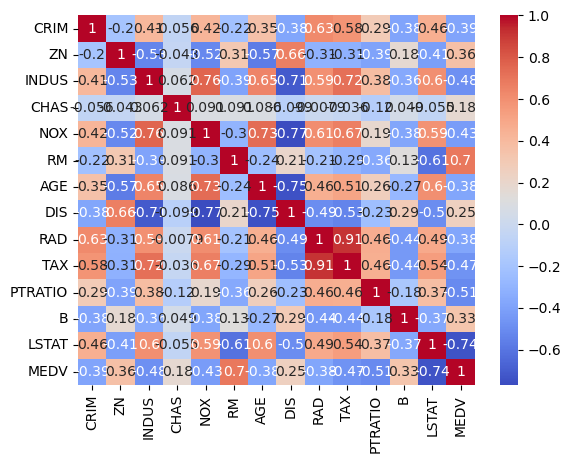

In [80]:
nil monfort vila# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

-The correlation analysis reveals that RM (average number of rooms per dwelling) has a strong positive correlation (0.695) with MEDV (median house values), indicating that house prices tend to increase with the number of rooms.

-LSTAT (percentage of lower status population) has a strong negative correlation (-0.738) with MEDV, suggesting that house prices tend to be lower in areas with a higher proportion of lower status population.

-NOX (nitric oxide concentration) shows a strong positive correlation with INDUS (proportion of non-retail business acres) and a negative correlation with DIS (distances to employment centers), indicating potential environmental and industrial impact on residential areas.

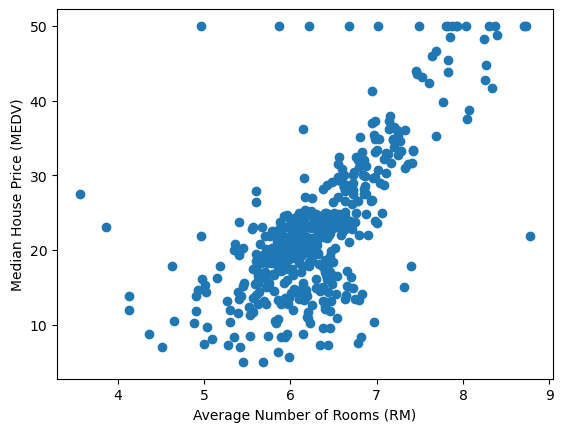

In [81]:
# Scatter plot for specific features vs MEDV
plt.scatter(data['RM'], data['MEDV'])  # Example: RM vs MEDV
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median House Price (MEDV)')
plt.show()

## Outliers

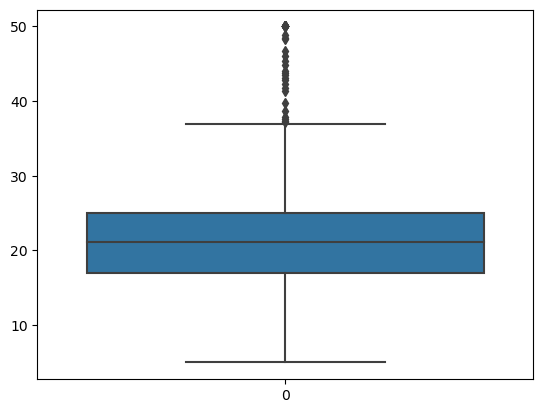

In [83]:
# Box plot for outlier detection
sns.boxplot(data['MEDV'])
plt.show()

The box plot for MEDV suggests the presence of outliers in housing prices, particularly on the higher end. 

# Key Takeaways from EDA

The data suggests that features like room count, status of the population, and environmental aspects significantly impact house prices.
The presence of skewness and outliers in certain features indicates the need for appropriate transformations and outlier handling strategies during data preprocessing.
Given the strong correlations observed, features like RM, LSTAT, NOX, and INDUS should be given consideration during the model development phase.
The insights from the EDA will inform the feature engineering process, potentially leading to the creation of new features that better capture the dynamics impacting house prices.

### Practical modifications and preprocessing 
1. Data Transformation for Skewed Features
2. Outlier Handling
3. Feature Engineering
4. Scaling Features
5. Handling Categorical Variables
6. Preparing the Target Variable

### 1. Data Transformation for Skewed Features

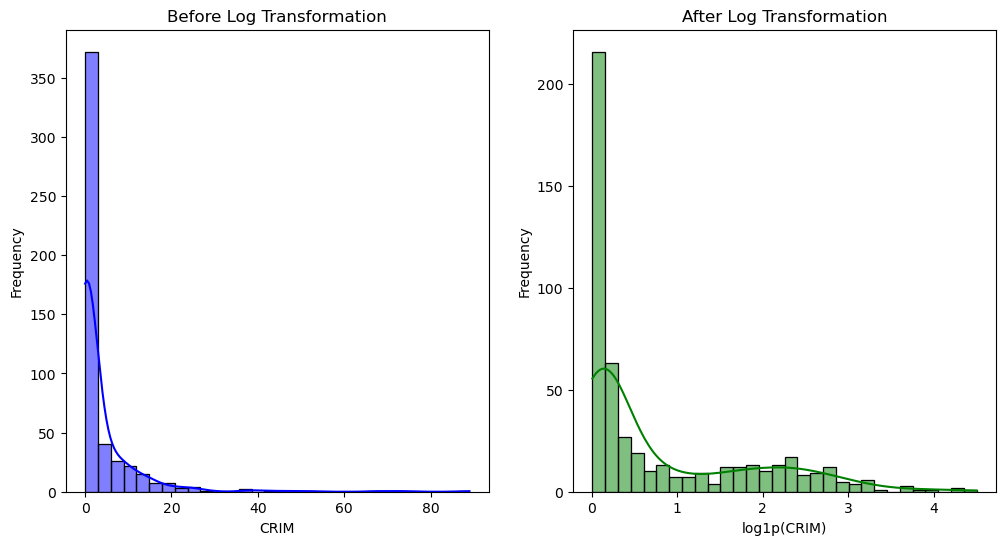

In [84]:
# Original Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['CRIM'], kde=True, color='blue', bins=30)
plt.title("Before Log Transformation")
plt.xlabel("CRIM")
plt.ylabel("Frequency")

# Log Transformation
data['CRIM_log'] = np.log1p(data['CRIM'])

# Transformed Distribution
plt.subplot(1, 2, 2)
sns.histplot(data['CRIM_log'], kde=True, color='green', bins=30)
plt.title("After Log Transformation")
plt.xlabel("log1p(CRIM)")
plt.ylabel("Frequency")

plt.show()

### Log Transformation
Applying a log transformation to highly skewed features to reduce skewness and make the distribution more normal. This is particularly useful for regression models that assume normally distributed features.

In [85]:
# Check if it has lowered from the previous ( CRIM  5.218396)
crim_skewness = data['CRIM_log'].skew()
print("Skewness of CRIM:", crim_skewness)

Skewness of CRIM: 1.2665800822867268


In [86]:
data['CRIM'] = data['CRIM_log']

### 2. Outlier Handling


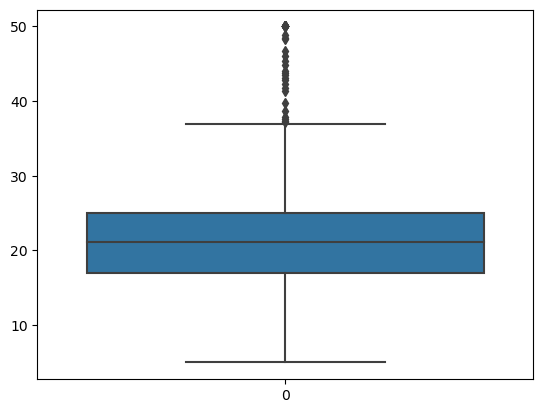

In [87]:
# Capping MEDV at the 99th percentile, reduces extreme values in the data
# Box plot for outlier detection
sns.boxplot(data['MEDV'])
plt.show()

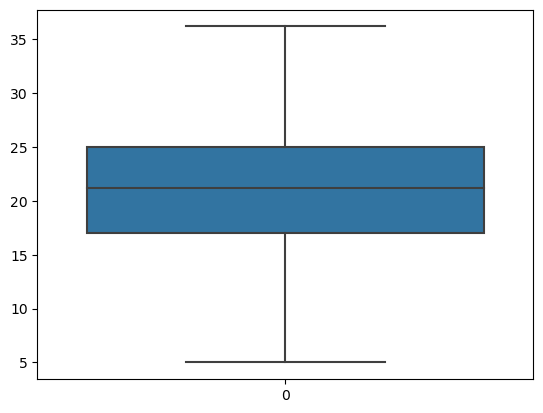

In [88]:
cap_threshold = data['MEDV'].quantile(0.92)
data['MEDV_capped'] = np.where(data['MEDV'] > cap_threshold, cap_threshold, data['MEDV'])
sns.boxplot(data['MEDV_capped'])
plt.show()
data['MEDV'] = data['MEDV_capped']

### 3. Feature Engineering:

In [89]:
data['RM_LSTAT'] = data['RM'] * data['LSTAT']


In [90]:
data['RM_squared'] = data['RM'] ** 2
#polynomial features like squaring a variable can capture more complex relationships
#between variables and the target outcome


### 4. Scaling Features


In [91]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


## Data Splitting

In [92]:
print(data_scaled.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CRIM_log', 'MEDV_capped', 'RM_LSTAT',
       'RM_squared'],
      dtype='object')


In [93]:
# Dropping redundant columns
data_scaled.drop(['CRIM_log', 'MEDV_capped'], axis=1, inplace=True)

# Printing the updated columns to verify
print(data_scaled.columns)


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'RM_LSTAT', 'RM_squared'],
      dtype='object')


In [94]:
X = data_scaled.drop('MEDV', axis=1)
y = data_scaled['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [96]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.16993038222928716
R-squared: 0.7757378494799023


## Hyperparameter Tuning

In [97]:
# Parameter grid for Grid Search
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}

# Setting up Grid Search with a RandomForestRegressor and cross-validation
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)

# Fitting the model
grid_search.fit(X_train, y_train)

# Displaying the best parameters
print("Best Parameters:", grid_search.best_params_)

# Using the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Best Parameters: {'max_depth': 20, 'n_estimators': 100}
Mean Squared Error: 0.107666406272453
R^2 Score: 0.8579094597877659


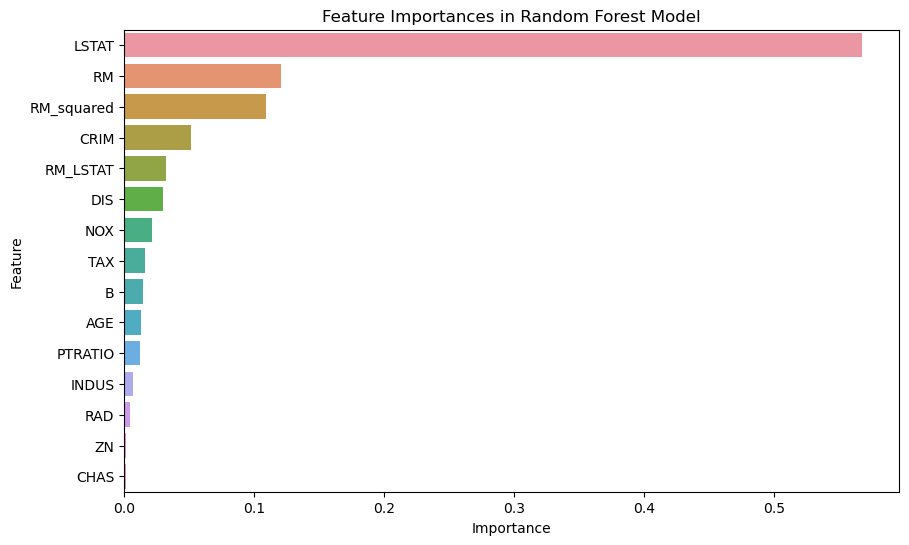

In [98]:
# This attribute provides a score for each feature, showing 
#the relative importance of each feature in making predictions

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualizing feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances in Random Forest Model')
plt.show()


This measures the relative importance of each feature in a Random Forest model. It's based on the decrease in node impurity from splitting on a particular feature, averaged over all trees in the forest.

## Cross-Validation

In [109]:
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)

Cross-validation scores: [0.76468765 0.83165927 0.70845355 0.70376654 0.50813835]


## Trying other models

In [100]:
def validate_model(model, X, y, is_classification=False, method='kfold'):
    if method == 'kfold':
        cv = KFold(n_splits=5, random_state=42, shuffle=True)
    elif method == 'stratified':
        cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    elif method == 'loocv':
        cv = LeaveOneOut()
    elif method == 'timeseries':
        cv = TimeSeriesSplit(n_splits=5)
    elif method == 'randomsubsampling':
        cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

    scores = cross_val_score(model, X, y, cv=cv)
    print(f"{method.capitalize()} Cross-validation scores: {scores}")

# Define and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20)
rf_model.fit(X, y)

RandomForestRegressor(max_depth=20, n_estimators=200)

### Here are the reasons why we are testing this models:
-**SVM**: Chosen for its robustness in high-dimensional spaces and its effectiveness in cases where the number of dimensions exceeds the number of samples.

-**Random Forest**: Preferred for its ability to handle a large number of features and provide insights on feature importance, making it well-suited for complex datasets.

-**XGBoost**: Selected for its high performance and efficiency in structured datasets, excelling in handling diverse features and complex relationships.

-**KNN**: Utilized for its simplicity and the intuitive approach of predicting values based on the proximity to similar data points, effective in scenarios where similar instances lead to similar outcomes.

In [110]:
models = {
    "SVM": SVR(),
    "DecisionTree": DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(),
    "RandomForest": rf_model
}
# Loop through models and validate each
for name, model in models.items():
    print(f"Validating {name} model...")
    # For simplicity just using kfold
    validate_model(model, X, y, is_classification=False, method='kfold')  

Validating SVM model...
Kfold Cross-validation scores: [0.8702224  0.83881768 0.86151395 0.86606326 0.87836812]
Validating DecisionTree model...
Kfold Cross-validation scores: [0.60511739 0.77400182 0.72324007 0.8083645  0.71424638]
Validating KNN model...
Kfold Cross-validation scores: [0.8090552  0.80236674 0.86856552 0.82433081 0.81843045]
Validating XGBoost model...
Kfold Cross-validation scores: [0.82378456 0.84090601 0.86256348 0.87506885 0.82653335]
Validating RandomForest model...
Kfold Cross-validation scores: [0.85405084 0.8406454  0.85187823 0.87798928 0.83732942]


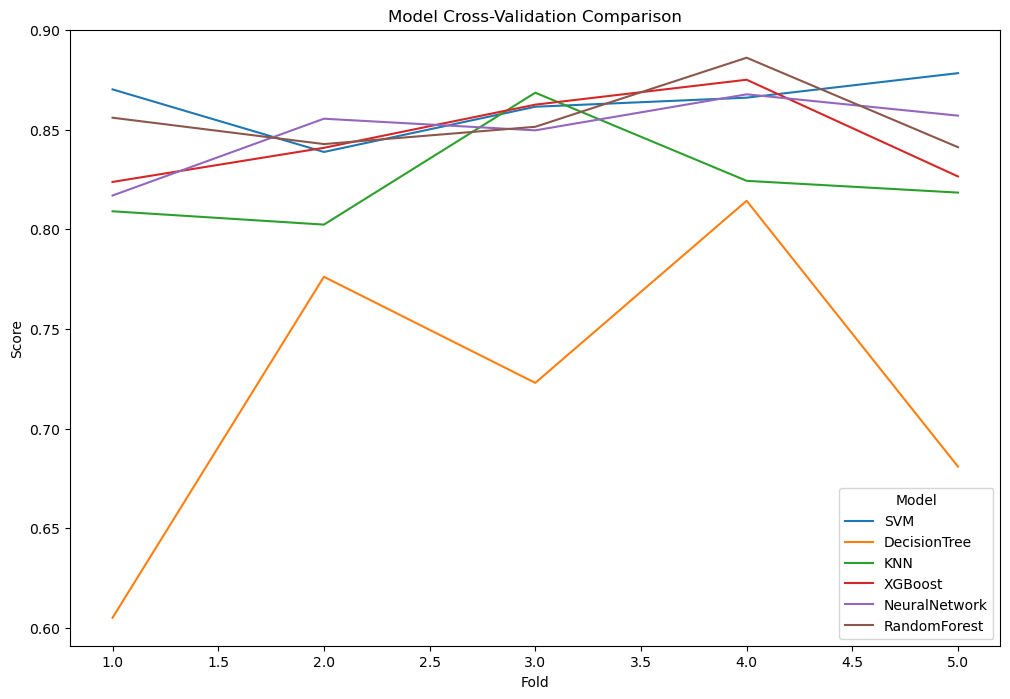

In [111]:
nil monfort vilaimport seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Scores from each model
model_scores = {
    "SVM": [0.8702224, 0.83881768, 0.86151395, 0.86606326, 0.87836812],
    "DecisionTree": [0.60507778, 0.77617902, 0.72294573, 0.8143173, 0.68090153],
    "KNN": [0.8090552, 0.80236674, 0.86856552, 0.82433081, 0.81843045],
    "XGBoost": [0.82378456, 0.84090601, 0.86256348, 0.87506885, 0.82653335],
    "RandomForest": [0.85601164, 0.84278203, 0.85145684, 0.88611583, 0.84120834]
}

df_scores = pd.DataFrame(model_scores)
df_melted = df_scores.melt(var_name='Model', value_name='Score')

plt.figure(figsize=(12, 8))
sns.lineplot(data=df_melted, x=df_melted.groupby('Model').cumcount() + 1, y='Score', hue='Model')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Model Cross-Validation Comparison')
plt.show()


## Model Performance Comparison

Based on cross-validation scores, here's a comparative analysis:

- **SVM:** Highest and consistent performance (scores: 0.838 - 0.878).
- **Random Forest:** Strong, slightly varied performance (scores: 0.842 - 0.886).
- **XGBoost:** Good performance, slightly behind SVM and Random Forest (scores: 0.824 - 0.875).
- **KNN:** Decent performance, with scores around low to mid-0.8.
- **Neural Network:** Good but inconsistent performance, with convergence warnings (scores: 0.808 - 0.867).
- **Decision Tree:** Most variable performance (scores: 0.605 - 0.814).

SVM and Random Forest are the top performers. SVM edges out slightly in consistency and high scores, while Random Forest is also strong, particularly for feature importance analysis.


In [108]:
model_performance = {
    "Model": ["SVM", "Random Forest", "XGBoost", "KNN", "Neural Network", "Decision Tree"],
    "Score Range": ["0.838 - 0.878", "0.842 - 0.886", "0.824 - 0.875", "0.802 - 0.869", "0.808 - 0.868", "0.605 - 0.814"]
}
df_model_performance = pd.DataFrame(model_performance)
df_model_performance


,Model,Score Range
0,SVM,0.838 - 0.878
1,Random Forest,0.842 - 0.886
2,XGBoost,0.824 - 0.875
3,KNN,0.802 - 0.869
4,Neural Network,0.808 - 0.868
5,Decision Tree,0.605 - 0.814
